# Using Machine Learning Tools 2024, Assignment 3

## Sign Language Image Classification using Deep Learning

## Overview

In this assignment you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The main aims of the assignment are:

 - To implement and train different types of deep learning network;
 
 - To systematically optimise the architecture and parameters of the networks;
  
 - To explore under- or over-fitting and know what appropriate actions to take in these cases.
 

During this assignment you will go through the process of implementing and optimising deep learning approaches. The way that you work is more important than the results for this assignment, as what is most crucial for you to learn is how to take a dataset, understand the problem, write appropriate code, optimize performance and present results. A good understanding of the different aspects of this process and how to put them together well (which will not always be the same, since different problems come with different constraints or difficulties) is the key to being able to effectively use deep learning techniques in practice.

This assignment relates to the following ACS CBOK areas: abstraction, design, hardware and software, data and information, and programming.


## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled dataset of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 50 training runs in total** (where one training run consists of fitting a DL model, with as many epochs as you think are needed, and with fixed model specifications and fixed hyperparameter settings - that is, not including hyper-parameter optimisation). In addition, because it is intended to be for a lightweight app, your manager wants to to **limit the number of total parameters in each network to a maximum of 500,000.** Also, the data has already been double-checked for problems by an in-house data wrangling team and all erroneous data has already been identified and then fixed by the client, so you **do not need to check for erroneous data** in this case.

In addition, you are told to **create a fixed validation set and any necessary test sets using _only_ the supplied _testing_ dataset.** It is unusual to do this, but here the training set contains a lot of non-independent, augmented images and it is important that the validation images must be totally independent of the training data and not made from augmented instances of training images.

The clients have asked to be informed about the following:
 - **unbiased median accuracy** estimate of the letter predictions from a deep learning model
 - the letter with the highest individual accuracy
 - the letter with the lowest individual accuracy
 - the three most common single types of error (i.e. where one letter is being incorrectly labelled as another)
 
Your manager has asked you to create a jupyter notebook that shows the following:
 - loading the data and displaying a sample of each letter
 - training and optimising both **densely connected** *and* **CNN** style models
 - finding the best single model, subject to a rapid turn-around and corresponding limit of 50 training runs in total
 - reporting clearly and concisely what networks you have tried, the method you used to optimise them, the associated learning curves, the number of total parameters in each, their summary performance and the selection process used to pick the best model
     - this should be clear enough that another employee, with your skillset, should be able to take over from you and understand your code and your methods
 - results from the model that is selected as the best, showing the information that the clients have requested
 - it is hoped that the median accuracy will exceed 94% overall and better than 85% for every individual letter, and you are asked to report (in addition to the client's requests):
     - the overall mean accuracy
     - the accuracy for each individual letter
     - a short written recommendation (100 words maximum) regarding how likely you think it is to achieve these goals either with the current model or by continuing to do a small amount of model development/optimisation


## Guide to Assessment

This assignment is much more free-form than others in order to test your ability to run a full analysis like this one from beginning to end, using the correct procedures. So you should use a methodical approach, as a large portion of the marks are associated with the decisions that you take and the approach that you use.  There are no marks associated with the performance - just report what you achieve, as high performance does not get better marks - to get good marks you need to use the right steps as well as to create clean, concise code and outputs, just as you've done in other assignments.

Make sure that you follow the instructions found in the scenario above, as this is what will be marked.  And be careful to do things in a way that gives you an *unbiased* result.

The notebook that you submit should be similar to those in the other assignments, where it is important to clearly structure your outputs and code so that it could be understood by your manager or your co-worker - or, even more importantly, the person marking it! This does not require much writing beyond the code, comments and the small amount of output text that you've seen in previous assignments.  Do not write long paragraphs to explain every detail of everything you do - it is not that kind of report and longer is definitely not better.  Just make your code clear, your outputs easy to understand (very short summaries often help here), and include a few small markdown cells that describe or summarise things when you think they are necessary.

Marks for the assignment will be determined according to the rubric that you can find on MyUni, with a breakdown into sections as follows:
 - 30%: Loading and displaying data, plus initial model training (acting as a baseline)
 - 50%: Optimisation of an appropriate set of models in an appropriate way (given the imposed constraints)
 - 20%: Comparison of models, selection of the single best model and reporting of final results

Your report (notebook) should be **divided clearly into three sections**, corresponding to the three bullet points listed above.

Remember that most marks will be for the **steps you take**, rather than the achievement of any particular results. There will also be marks for showing appropriate understanding of the results that you present.  

What you need to do this assignment can all be found in the first 10 weeks of workshops, lectures and also the previous two assignments.

## Final Instructions

While you are free to use whatever IDE you like to develop your code, your submission should be formatted as a Jupyter notebook that interleaves Python code with output, commentary and analysis, and clearly divided into three main sections as described above. 
- All data processing must be done within the notebook after calling appropriate load functions.
- Comment your code appropriately, so that its purpose is clear to the reader, but not so full of comments that it is hard to follow the flow of the code. Also avoid interspersing, in the same cell, code that is run with function definitions as they make code hard to follow.
- In the submission file name, do not use spaces or special characters.

The marks for this assignment are mainly associated with making the right choices and executing the workflow correctly and efficiently, as well as having clean and concise code and outputs. Make sure your code and outputs are easy to follow and not unnecessarily long. Use of headings and very short summaries can help, and try to avoid lengthy portions of text or plots. The readability of the report (notebook) will count towards the marks (and please note that _excessive_ commenting or text outputs or text in output cells is strongly discouraged and will result in worse grades, so aim for a modest, well-chosen amount of comments and text in outputs).

This assignment can be solved using methods from sklearn, pandas, matplotlib, seaborn and keras/tensorflow, as presented in the workshops. Other high-level libraries should not be used, even though they might have nice functionality such as automated hyperparameter or architecture search/tuning/optimisation. For the deep learning parts please restrict yourself to the library calls used in workshops 7-10 or ones that are very similar to these. You are expected to search and carefully read the documentation for functions that you use, to ensure you are using them correctly.

As ususal, feel free to use code from internet sources, ChatGPT or the workshops as a base for this assignment, but be aware that they may not do *exactly* what you want (code examples rarely do!) and so you will need to make suitable modifications. Appropriate references for substantial excerpts, even if modified, should be given.


### Preparing Data

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# from transformers import AutoTokenizer, TFBertForSequenceClassification

2024-08-13 05:40:48.940087: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-13 05:40:48.946477: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 05:40:48.953672: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 05:40:48.955858: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-13 05:40:48.961928: I tensorflow/core/platform/cpu_feature_guar

In [2]:
train_dataset = tf.data.TextLineDataset('data/sign_mnist_train.csv').skip(1)
test_dataset = tf.data.TextLineDataset('data/sign_mnist_test.csv').skip(1)

I0000 00:00:1723542049.862896    9393 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723542049.881579    9393 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723542049.881683    9393 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1723542049.883343    9393 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [3]:
def parse_csv(line):
    split_line = tf.strings.split(line, ',')
    split_line = tf.strings.to_number(split_line)
    label = tf.reshape(split_line[0], [1])
    pixels = tf.reshape(split_line[1:], [32, 32])
    pixels = pixels/255
    
    return (pixels, label)

def preprocess(dataset, is_training_split=True, batch_size=32):
    dataset = dataset.map(parse_csv)

    splits = []
    if not is_training_split:
        leng = sum([1 for _ in dataset])
        split_leng = leng // 2
        valid_set = dataset.take(split_leng)
        test_set = dataset.skip(split_leng)
        splits.extend([valid_set, test_set])
    else:
        splits.append(dataset)

    processed_splits = []
    for split in splits:
        processed_split = split.batch(batch_size).prefetch(tf.data.AUTOTUNE)
        processed_splits.append(processed_split)

    return processed_splits

In [4]:
[train_dataset] = preprocess(train_dataset)
[valid_dataset, test_dataset] = preprocess(test_dataset, is_training_split=False)

2024-08-13 05:40:50.503415: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [5]:
def find_unique_labels(dataset):
    unique_labels = set()
    
    for _, label in dataset: 
        label_value = label.numpy().flatten()[0]  
        unique_labels.add(label_value)  

    return sorted(unique_labels)

unique_labels = find_unique_labels(train_dataset)
print("Unique labels:", unique_labels)
print('Total Unique Labels: ', len(unique_labels))

Unique labels: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0]
Total Unique Labels:  24


2024-08-13 05:40:51.748766: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Surprisingly, there are only 24 letters labels while the actal ASL contains 26. After a little research, I found out that the letters 'J' and 'Z' are not used in many datasets because of the way they are used. So is the case with our dataset. <br>
Now, we can not use 24 neurons in the output layer, because in that case the maximum value of labels would be 23 (0 to 23), while the maximum label value here is 24, causing a mismatch. Moreover, we can't just remap the labels either, because that would mess with their character representations while using `ord`.<br>
Thus, I am resorting to using 25 neurons in the final layer instead of 24 - this solves both of the problems above but might lead to _slightly_ less accurate results.

#### Visualizations

/tmp/ipykernel_9393/1690095945.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label_value = int(labels[j].numpy())


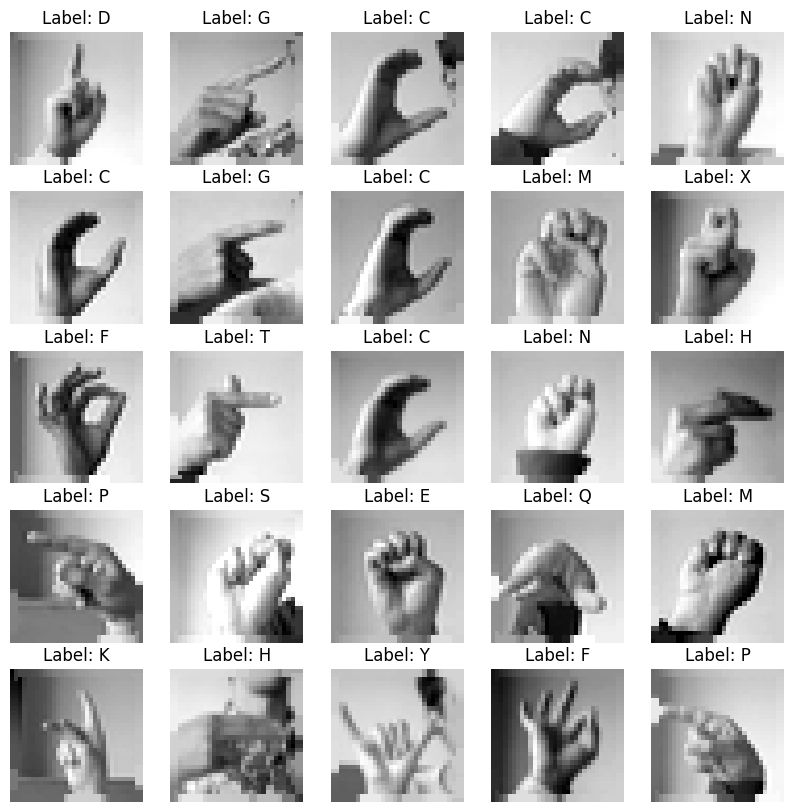

In [6]:
def display_sample_images(dataset, num_samples=5):
    plt.figure(figsize=(10, 10))
    for i, (images, labels) in enumerate(dataset.take(num_samples)):
        for j in range(num_samples):
            ax = plt.subplot(num_samples, num_samples, i * num_samples + j + 1)
            plt.imshow(images[j].numpy(), cmap='gray')
            
            label_value = int(labels[j].numpy())
            label_char = chr(label_value + ord('A'))  
            
            plt.title(f"Label: {label_char}")
            plt.axis('off')
    plt.show()

display_sample_images(train_dataset)

#### Baseline Model Training

In [7]:
baseline_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32)),  
    keras.layers.Dense(256, activation='relu'),  
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dense(25, activation='softmax')  
])

baseline_model.summary()

/home/thory/miniconda3/envs/small-projects-ml/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 25)             │         3,225 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 298,521 (1.14 MB)

 Trainable params: 298,521 (1.14 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
import datetime

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping = keras.callbacks.EarlyStopping(patience=10)


callbacks=[early_stopping, tensorboard]
baseline_model.compile(optimizer=keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [9]:
history = baseline_model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=100,  
    verbose=1,
    callbacks=callbacks
)

Epoch 1/100


: 

In [9]:
%load_ext tensorboard
%tensorboard --logdir logs/fit

In [ ]:
def plot_learning_curves(history):
    plt.figure(figsize=(14, 5))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_learning_curves(history_dnn)

In [24]:
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(26, activation='softmax')
])

cnn_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 flatten_6 (Flatten)         (None, 2048)             

In [25]:
cnn_optimizer = keras.optimizers.Adam(learning_rate=0.0001)
cnn_model.compile(optimizer=cnn_optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
cnn_history = cnn_model.fit(
    train_dataset,
    validation_data=valid_dataset,
    epochs=20,  
    verbose=1,
    callbacks=[keras.callbacks.EarlyStopping(patience=5)]
)

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(test_dataset)
print(f"Test Accuracy: {test_accuracy:.4f}")

In [ ]:
from sklearn.metrics import accuracy_score
from collections import Counter
import numpy as np

def evaluate_model_performance(model, test_dataset):
    y_true = []
    y_pred = []

    # Collect true labels and predictions
    for images, labels in test_dataset:
        predictions = model.predict(images)
        predicted_labels = np.argmax(predictions, axis=1)
        y_true.extend(labels.numpy())
        y_pred.extend(predicted_labels)
    
    # Convert to numpy arrays for easier handling
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Calculate individual accuracies
    individual_accuracies = []
    unique_labels = np.unique(y_true)

    for label in unique_labels:
        label_mask = (y_true == label)
        accuracy = accuracy_score(y_true[label_mask], y_pred[label_mask])
        individual_accuracies.append(accuracy)

    # Calculate unbiased median accuracy
    median_accuracy = np.median(individual_accuracies)
    print(f"Unbiased Median Accuracy: {median_accuracy:.4f}")

    # Find highest and lowest individual accuracy
    highest_accuracy = max(individual_accuracies)
    lowest_accuracy = min(individual_accuracies)
    highest_accuracy_letter = unique_labels[np.argmax(individual_accuracies)]
    lowest_accuracy_letter = unique_labels[np.argmin(individual_accuracies)]

    print(f"Highest Accuracy: {highest_accuracy:.4f} (Letter: {chr(highest_accuracy_letter + ord('A'))})")
    print(f"Lowest Accuracy: {lowest_accuracy:.4f} (Letter: {chr(lowest_accuracy_letter + ord('A'))})")

    # Identify the three most common single types of errors
    confusion_pairs = [(true, pred) for true, pred in zip(y_true, y_pred) if true != pred]
    common_errors = Counter(confusion_pairs).most_common(3)

    print("Three Most Common Errors:")
    for error, count in common_errors:
        true_label, pred_label = error
        print(f"True Label: {chr(true_label + ord('A'))}, Predicted: {chr(pred_label + ord('A'))}, Count: {count}")

    return {
        "median_accuracy": median_accuracy,
        "highest_accuracy": highest_accuracy,
        "highest_accuracy_letter": chr(highest_accuracy_letter + ord('A')),
        "lowest_accuracy": lowest_accuracy,
        "lowest_accuracy_letter": chr(lowest_accuracy_letter + ord('A')),
        "common_errors": common_errors
    }

In [ ]:
performance_metrics = evaluate_model_performance(cnn_model, test_dataset)
performance_metrics

For the sake of cleanliness, I am deleting all cells with previous runs that didn't work out so well. Here is a summary of all the training runs.<br>

| **Run** | **Model Architecture**                       | **Optimizer** |**Additional Info**| **Learning Rate** | **Epochs** | **Best Validation Accuracy** |
|---------|----------------------------------------------|---------------|-----|--------------|------------|-----------------------------|
| 1       | Flatten() - Dense(350) - Dense(150) - Output() | Adam         | -- | 0.005             | 10         | 0.74                        |
| 2       | Flatten() - Dense(350) - Dense(150) - Output() | Adam         | -- | 0.005 (7 Epochs), then 0.0005 (7 Epochs)           | 14   | 0.76 |
| 3       | Flatten() - Dense(300) - Dense(120) - Output() | Adam         | L2 Regularization 0.001 | 0.0005 (15 Epochs), then 0.00005 (7 Epochs)        | 22   | 0.67 |
| 4       | Flatten() - Dense(400) - Dense(200) - Output() | Nadam        | Dropout 10 % | 0.0005 (5 Epochs), then 0.0002 (5 Epochs), then 0.00004 (5 Epochs)        | 15   | 0.81 |